SABR model:
$$
\begin{aligned}
    &dF_t = \alpha_t F_t^{\beta} dW_t\\
    &d\alpha_t = v \alpha_t dZ_t\\
    dW_t dZ_t = \rho dt
\end{aligned}
$$

Let us introduce parameters:
$$
\begin{aligned}
&F_m = \sqrt{F K}\\
&\zeta = \dfrac{v}{\alpha}F_m^{1-\beta}\log \dfrac{F}{K}\\
&X(\zeta, \rho) = \log \dfrac{\sqrt{1 - 2 \zeta \rho + \zeta^2} + \zeta - \rho}{1-\rho}\\
&q_1 = \dfrac{(\beta-1)^2 \alpha^2 F_m^{2\beta - 2}}{24}\\
&q_2 = \dfrac{\rho \beta \alpha v F_m^{\beta - 1}}{4}\\
&q_3 = \dfrac{2-3\rho^2}{24}v^2\\
&S = 1 + T(q_1 + q_2 + q_3)\\
&D = F_m^{1-\beta}\left[ 1 + \dfrac{(\beta-1)^2}{24} \log^2 \dfrac{F}{K} + \dfrac{(\beta-1)^4}{1920}\log^4 \dfrac{F}{K}\right]\\
\end{aligned}
$$
$$
\sigma = \dfrac{\alpha S}{D} \times \dfrac{\zeta}{X(\zeta, \rho)}
$$

In [1]:
from sabr import SABR
from sabr_calibration import SABRCalibrator

from heston import Heston
from heston_calibration import HestonCalibrator

import numpy as np
from matplotlib import pyplot as plt

# SABR calibration example

In [2]:
#sabr model parameters
alpha = 0.2
v = 0.9
beta = 0.9
rho = -0.5

sabr_params_0 = np.asarray([alpha, v, beta, rho])

#market params
r = 0
F = 4.0
T = 1.123

#strikes
Kn = F * np.linspace(0.5, 2.6, 32)

In [3]:
#sabr model
sabr_0 = SABR(sabr_params_0, r)

In [4]:
c0, iv0 = sabr_0( Kn, F, T )

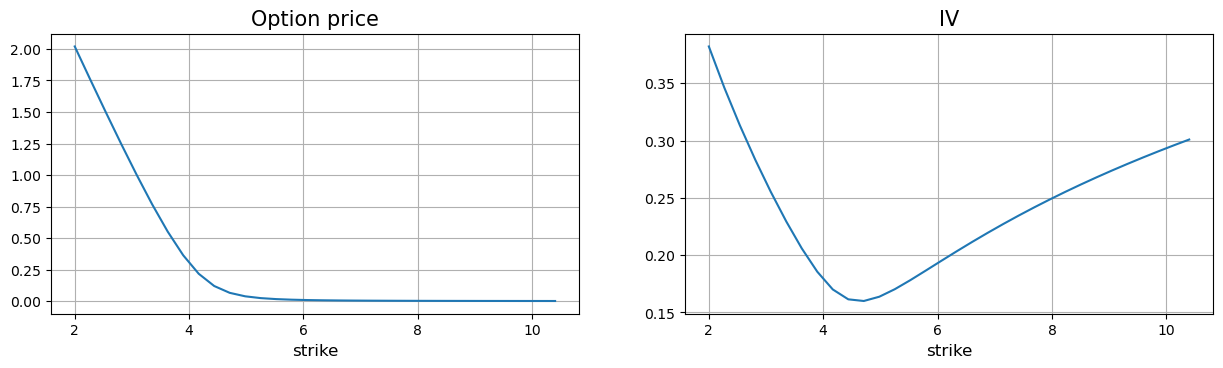

In [5]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, c0)
ax1.grid()
ax1.set_title("Option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, iv0)
ax2.grid()
ax2.set_title("IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

plt.show()
None

### Calibration:

In [6]:
#sabr calibrator object
sabr_calib = SABRCalibrator(r)

 23%|██▎       | 23/100 [00:00<00:00, 508.10it/s]


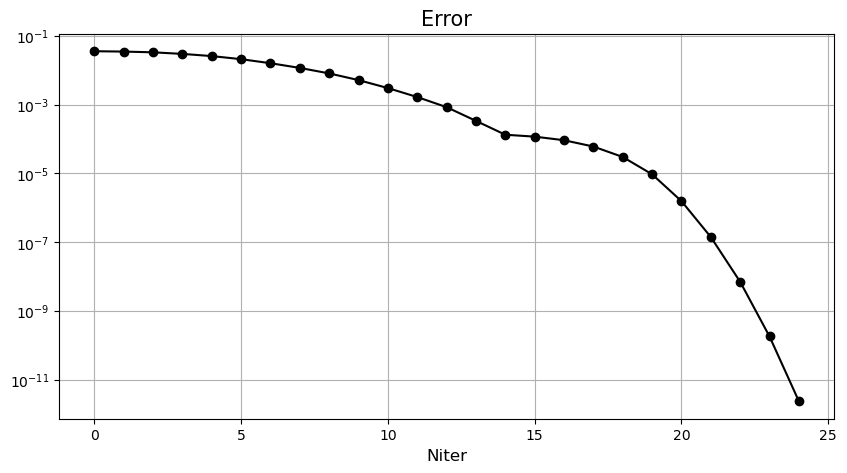

In [7]:
#calibrate sabr model
result = sabr_calib.fit_iv(iv0, Kn, F, T, fit_beta=True)
plt.figure(figsize=(10, 5))
plt.semilogy(result['objective'], '-ok')
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()
plt.show()

In [8]:
print("real params:", sabr_params_0)
print("calib params:", sabr_calib.sabr_params)

real params: [ 0.2  0.9  0.9 -0.5]
calib params: [ 0.19999997  0.90000001  0.90000013 -0.50000004]


In [9]:
#predict option prices
c1, iv1 = sabr_calib.predict(Kn, F, T )

In [10]:
c1 - c0

array([-6.74813982e-10, -4.81626738e-10, -1.52808877e-10,  3.28868488e-10,
        9.55690194e-10,  1.65664193e-09,  2.22811014e-09,  2.27532171e-09,
        1.43111967e-09,  9.95241667e-11, -7.29636906e-10, -8.92275309e-10,
       -7.67312602e-10, -5.90786725e-10, -4.36840342e-10, -3.17488591e-10,
       -2.28151331e-10, -1.61748989e-10, -1.12208867e-10, -7.49605586e-11,
       -4.67022185e-11, -2.50739152e-11, -8.38518144e-12,  4.58400679e-12,
        1.47227334e-11,  2.26861273e-11,  2.89621695e-11,  3.39182172e-11,
        3.78335037e-11,  4.09224668e-11,  4.33510519e-11,  4.52489417e-11])

In [11]:
iv1 - iv0

array([-2.49182136e-09, -1.26440847e-09, -2.91852986e-10,  4.66810257e-10,
        1.03156789e-09,  1.40027342e-09,  1.54069851e-09,  1.38197229e-09,
        8.54369298e-10,  6.74748035e-11, -6.34793329e-10, -1.05520964e-09,
       -1.24140370e-09, -1.28589456e-09, -1.24928132e-09, -1.16473028e-09,
       -1.05030193e-09, -9.16287463e-10, -7.68890368e-10, -6.12061735e-10,
       -4.48443227e-10, -2.79877399e-10, -1.07691661e-10,  6.71257494e-11,
        2.43825293e-10,  4.21823576e-10,  6.00664352e-10,  7.79980913e-10,
        9.59478663e-10,  1.13892046e-09,  1.31810812e-09,  1.49688262e-09])

In [29]:
#heston parameters
v_0 = 0.01
theta = 0.02
rho = -0.1
k = 2.0
sigma = 0.23

heston_params = np.asarray([v_0, theta, rho, k, sigma])

In [30]:
#heston model object
heston = Heston(heston_params, r)

In [31]:
#heston option price and iv
ch, ivh = heston(Kn, F, T)

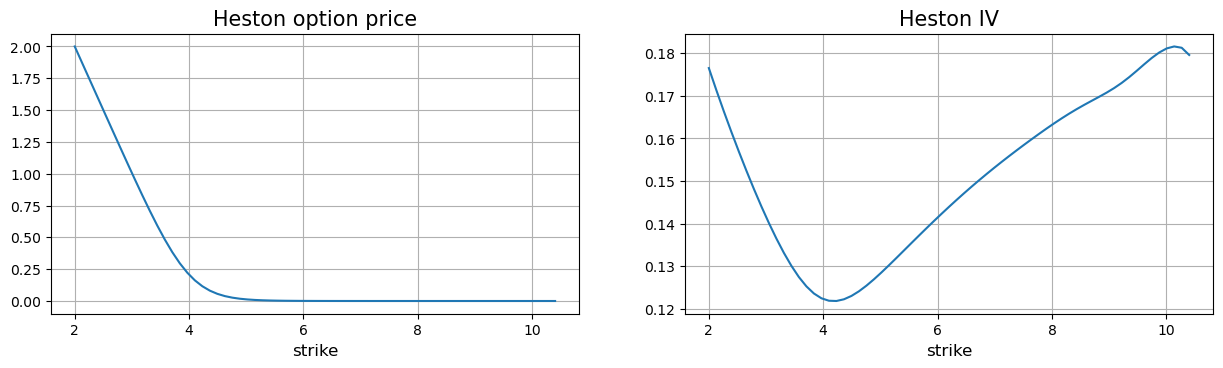

In [37]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch)
ax1.grid()
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh)
ax2.grid()
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)
plt.show()
None

### Calibration to heston data

In [38]:
#calibrating sabr to heston
result = sabr_calib.fit_price(ch, Kn, F, T, typ=True, fit_beta=True)
plt.figure(figsize=(10, 5))
plt.semilogy(result['objective'])
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

100%|██████████| 100/100 [00:00<00:00, 533.16it/s]


In [39]:
sabr_calib.sabr_params

array([ 0.12076766,  0.40205138,  0.99990298, -0.10332717])

In [40]:
#predicting 
c1, iv1 = sabr_calib.predict(Kn, F, T )

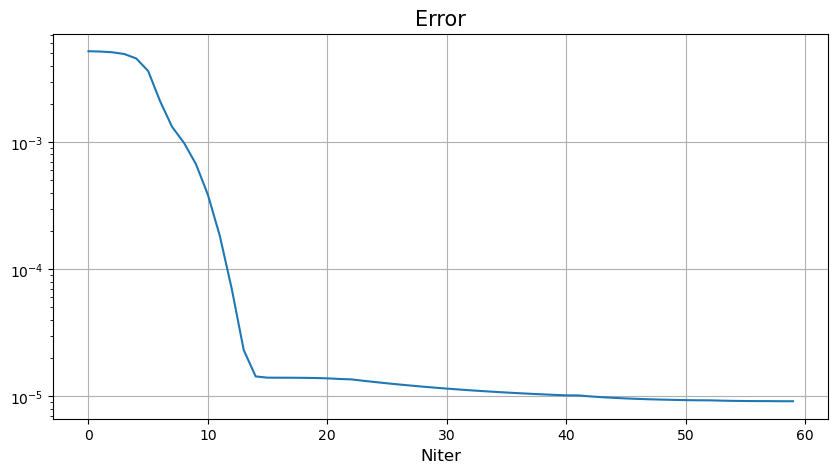

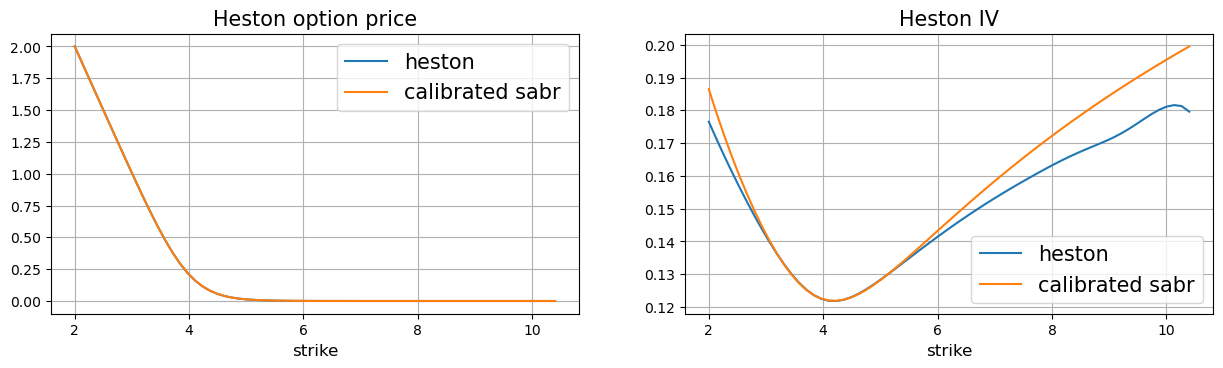

In [41]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch, label='heston')
ax1.plot(Kn, c1, label='calibrated sabr')
ax1.grid()
ax1.legend(fontsize=15)
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh, label='heston')
ax2.plot(Kn, iv1, label='calibrated sabr')
ax2.grid()
ax2.legend(fontsize=15)
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)
plt.show()
None

In [42]:
err_c = np.linalg.norm(c1 - ch) / np.linalg.norm(ch) * 100
err_iv = np.linalg.norm(iv1 - ivh) / np.linalg.norm(ivh) * 100

In [43]:
print(f"error in option price = {err_c:.4f}%,\nerror in iv = {err_iv:.4f}%")

error in option price = 0.0124%,
error in iv = 5.2683%


# Implied volatility in SABR model

In [44]:
#sabr model parameters
alpha_0 = 0.2
v_0 = 0.9
beta_0 = 0.9
rho_0 = -0.5

sabr_params_0 = np.asarray([alpha_0, v_0, beta_0, rho_0])

#market params
r = 0
F = 4.0
T = 1.123

#strikes
Kn = F * np.linspace(0.5, 2.6, 65)

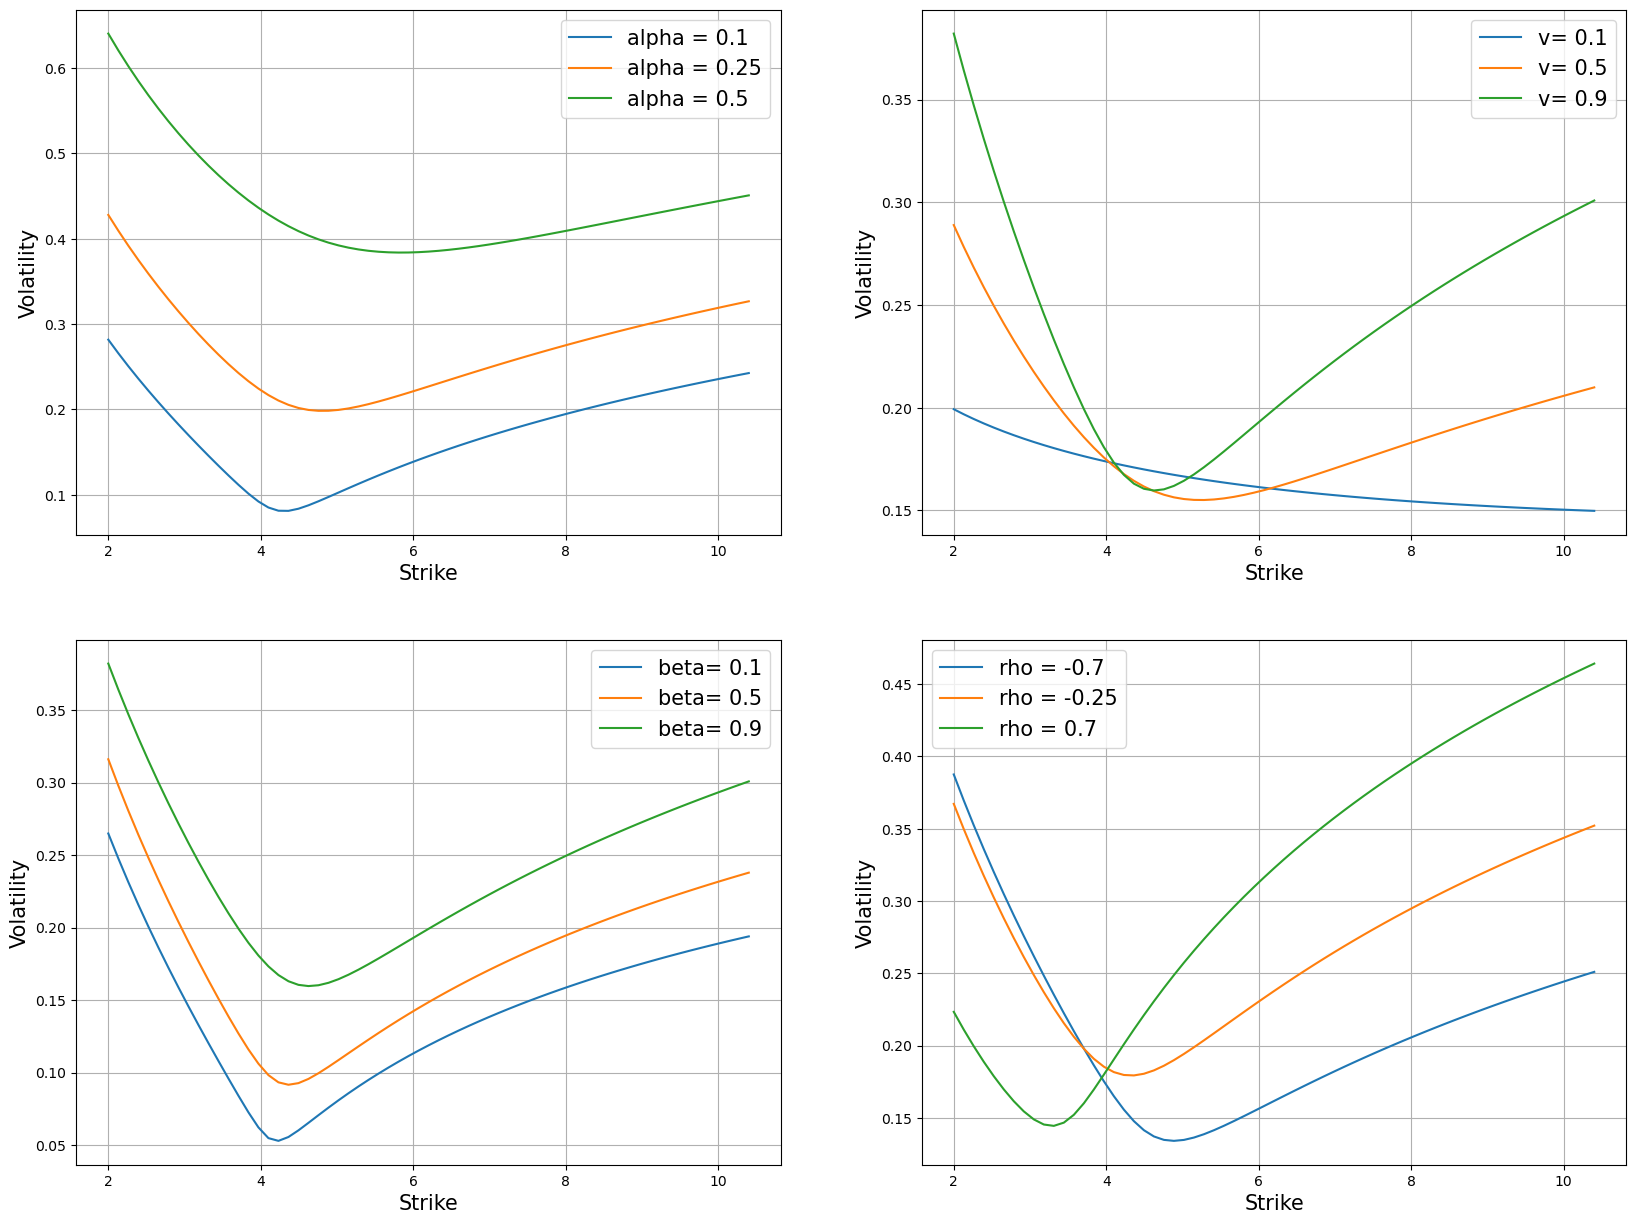

In [45]:
#plotting IV

plt.figure(figsize=(20, 15))
alphas = [0.1, 0.25, 0.5]
vs     = [0.1, 0.5, 0.9]
betas  = [0.1, 0.5, 0.9]
rhos   = [-0.7, -0.25, 0.7]


i = 1
for alpha in alphas:
    sabr_params = np.asarray([alpha, v_0, beta_0, rho_0])
    sabr = SABR(sabr_params, r)
    c, iv = sabr(Kn, F, T)
    
    ax = plt.subplot(2, 2, i)
    
    ax.plot(Kn, iv, label=f'alpha = {alpha}')
    #ax.grid()
    ax.legend(fontsize=15)
    ax.set_xlabel('Strike', fontsize=15)
    ax.set_ylabel('Volatility', fontsize=15)
ax.grid(True)
i += 1

for v in vs:
    sabr_params = np.asarray([alpha_0, v, beta_0, rho_0])
    sabr = SABR(sabr_params, r)
    c, iv = sabr(Kn, F, T)
    
    ax = plt.subplot(2, 2, i)
    
    ax.plot(Kn, iv, label=f'v= {v}')
    #ax.grid()
    ax.legend(fontsize=15)
    ax.set_xlabel('Strike', fontsize=15)
    ax.set_ylabel('Volatility', fontsize=15)
ax.grid(True)
i += 1

for beta in betas:
    sabr_params = np.asarray([alpha_0, v_0, beta, rho_0])
    sabr = SABR(sabr_params, r)
    c, iv = sabr(Kn, F, T)
    
    ax = plt.subplot(2, 2, i)
    
    ax.plot(Kn, iv, label=f'beta= {beta}')
    #ax.grid()
    ax.legend(fontsize=15)
    ax.set_xlabel('Strike', fontsize=15)
    ax.set_ylabel('Volatility', fontsize=15)
ax.grid(True)
i += 1

for rho in rhos:
    sabr_params = np.asarray([alpha_0, v_0, beta_0, rho])
    sabr = SABR(sabr_params, r)
    c, iv = sabr(Kn, F, T)
    
    ax = plt.subplot(2, 2, i)
    
    ax.plot(Kn, iv, label=f'rho = {rho}')
    
    ax.legend(fontsize=15)
    ax.set_xlabel('Strike', fontsize=15)
    ax.set_ylabel('Volatility', fontsize=15)
ax.grid(True)
plt.show()

# Countur plot

In [63]:
from sabr_calibration import gen_random_sabr_params
from sabr_approx import sabr_approx

In [64]:
def objective(K, F, T, r, iv0, alpha, v, beta, rho):
    C, iv = sabr_approx(K, F, T, r, alpha, v, beta, rho)
    f = 0.5 * np.linalg.norm(iv - iv0) ** 2
    return f

In [125]:
#sabr model parameters
alpha_0 = 0.5
v_0 = 0.5
beta_0 = 0.5
rho_0 = 0.0

sabr_params_0 = np.asarray([alpha_0, v_0, beta_0, rho_0])

#market params
r = 0
F = 4.0
T = 1.123

#strikes
Kn = F * np.linspace(0.5, 2.6, 32)

In [126]:
#sabr model
sabr_0 = SABR(sabr_params_0, r)

In [127]:
c0, iv0 = sabr_0(Kn, F, T)

In [151]:
sabr_calib = SABRCalibrator(r)

res = sabr_calib.fit_iv(iv0, Kn, F, T)

 25%|██▌       | 25/100 [00:00<00:00, 560.34it/s]


In [162]:
obj_trajectory = [objective(Kn, F, T, r, iv0, *sabr_params) for sabr_params in res['xs']]
obj_trajectory = np.asarray(obj_trajectory)

alpha_traj = np.asarray( [sabr_params[0] for sabr_params in res['xs']] )
v_traj = np.asarray( [sabr_params[1] for sabr_params in res['xs']] )
beta_traj = np.asarray( [sabr_params[2] for sabr_params in res['xs']] )
rho_traj = np.asarray( [sabr_params[3] for sabr_params in res['xs']] )

In [178]:
Ngrid = 20

alpha_grid = np.linspace(0.05, 0.95, 2 * Ngrid)
v_grid = np.linspace(0.05, 1.0, Ngrid)
beta_grid = np.linspace(0.05, 0.95, 3 * Ngrid)
rho_grid = np.linspace(-0.7, 0.7, Ngrid // 2)

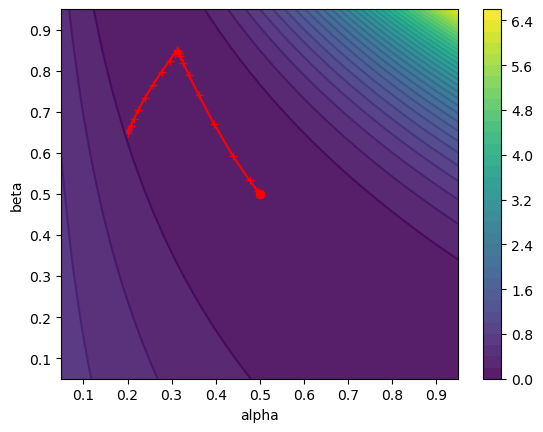

In [185]:
f = [ [objective(Kn, F, T, r, iv0, alpha, v_0, beta, rho_0) for alpha in alpha_grid] for beta in beta_grid ]
f = np.asarray(f)

fig, ax = plt.subplots()
cont = ax.contourf(alpha_grid, beta_grid, f, levels=40, alpha=0.9)
ax.plot(alpha_0, beta_0, 'ro')
ax.plot(alpha_traj, beta_traj, '-+r')
ax.contour(alpha_grid, beta_grid, f, levels=40)
fig.colorbar(cont)
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
plt.show()

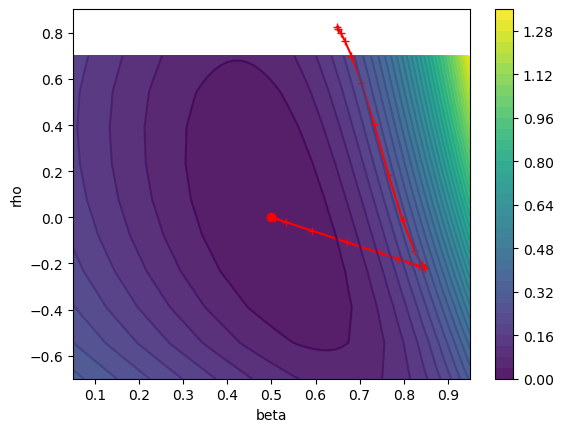

In [186]:
f = [ [objective(Kn, F, T, r, iv0, alpha_0, v_0, beta, rho) for beta in beta_grid] for rho in rho_grid ]
f = np.asarray(f)

fig, ax = plt.subplots()
cont = ax.contourf(beta_grid, rho_grid, f, levels=40, alpha=0.9)
ax.plot(beta_0, rho_0, 'ro')
ax.plot(beta_traj, rho_traj, '-+r')
ax.contour(beta_grid,rho_grid, f, levels=40)
fig.colorbar(cont)
ax.set_xlabel('beta')
ax.set_ylabel('rho')
plt.show()

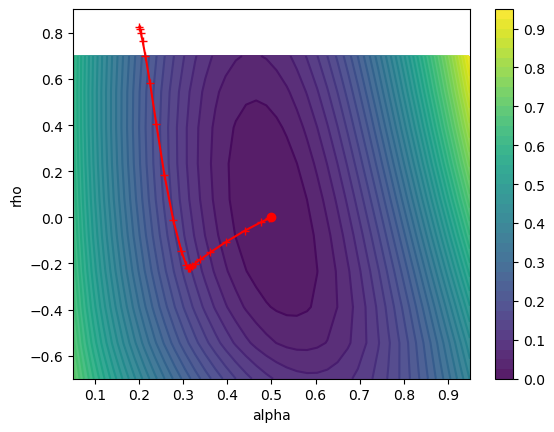

In [187]:
f = [ [objective(Kn, F, T, r, iv0, alpha, v_0, beta_0, rho) for alpha in alpha_grid] for rho in rho_grid ]
f = np.asarray(f)

fig, ax = plt.subplots()
cont = ax.contourf(alpha_grid, rho_grid, f, levels=40, alpha=0.9)
ax.contour(alpha_grid, rho_grid, f, levels=40)
ax.plot(alpha_0, rho_0, 'ro')
ax.plot(alpha_traj, rho_traj, '-+r')
ax.set_xlabel('alpha')
ax.set_ylabel('rho')
fig.colorbar(cont)
plt.show()